# PPG Heart Rate Exercise

Do this exercise after the HR exercise where you get familiar with neurokit2 methods.

# PPG SpO2 Analysis Exercise Walkthrough

This guide walks you through the process of analyzing PPG signals to estimate blood oxygen saturation (SpO2). Follow the steps carefully, defining the required variables and applying the suggested functions.

---

### 1. Load the Necessary Libraries and Data

Use the loading code as provided. Adjust variable `path` to the correct path 
of the data if you want to use your own data.

---

### 2. Visualize the Raw PPG Data
- Plot the raw PPG signals (only infrared and red channels).

#### Hints:
- Use `nk.signal_plot()` to plot the `PPG Infrared` and `PPG Red` signals.

---

### 3. Extract and Clean the PPG Signals
- Extract the raw values of the red and infrared PPG signals.
- Apply a cleaning function to remove noise and center the signals around.
- Plot the cleaned signals for comparison.

#### Hints:
- Extract the relevant columns as NumPy arrays.
- Use `nk.ppg_clean()` to clean both signals.
- Store the cleaned signals in variables.
- Use `nk.signal_plot()` with appropriate labels.

---

### 4. Compute the AC and DC Components
- Compute the AC (alternating) and DC (direct) components for both the red and infrared signals.
- The AC component can be estimated using the standard deviation.
- The DC component can be estimated using the mean.

#### Hints:
- Use `np.std()` for AC calculation on the **cleaned** and centered data.
- Use `np.mean()` for DC calculation on the original **raw** data.
- Store results in separate variables.

---

### 5. Calculate the Ration R
- Compute the ratio of the red and infrared signals using the AC and DC components.
- Apply a known formula to estimate SpO2.

$$R = \left(\frac{AC_{660}}{DC_{660}}\right) / \left(\frac{AC_{940}}{DC_{940}}\right)$$

#### Hints:
- Compute the ratio using `(AC_red / DC_red) / (AC_ir / DC_ir)`.
  

---

### 5. Calculate % SpO2
- Apply the following empirical formulas to estimate SpO2 as a function of R.
  1. Formula 1: $SpO2 = 110 - 25*R$
  2. Formula 2: $SpO2 = 100 - 23.3*(R-0.4)$
- Note: These formulas are approximations to the empirical relation shown in the lecture
- Remember the values SpO2 values for the next lecture














In [22]:
#! pip install neurokit2 plotly joblib

In [1]:
import helpers as hp
import pandas as pd
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt

# Set global figure size
plt.rcParams["figure.figsize"] = (12, 4)

srate = 25 # EmotiBit PPG sampling rate

path = 'example_data'
ppg_data = hp.load_emotibit_ppg(path)
ppg_data.head()


,PPG Green,PPG Infrared,PPG Red
2024-03-03 19:51:04.380907059,9743.0,160363.0,152966.0
2024-03-03 19:51:04.420907021,9743.0,160150.0,152851.0
2024-03-03 19:51:04.460907936,9638.0,159320.0,152482.0
2024-03-03 19:51:04.500907898,9434.0,158531.0,152110.0
2024-03-03 19:51:04.540909052,9238.0,158171.0,151934.0


Text(0.5, 1.0, 'Raw PGG signals')

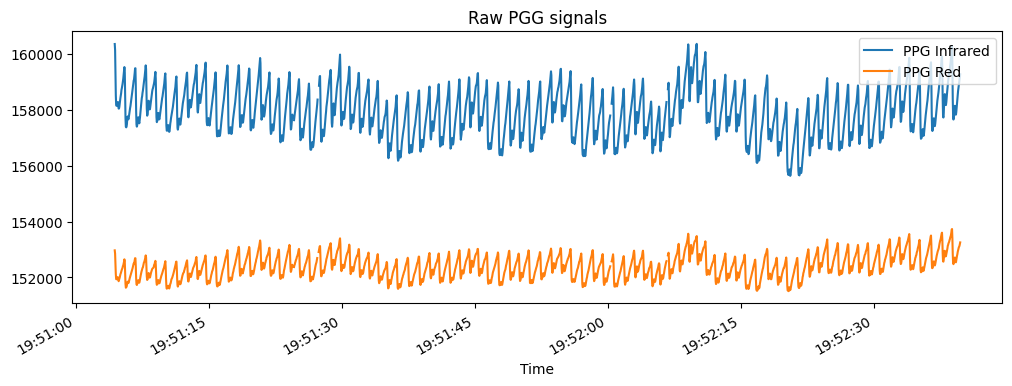

In [2]:
# plot all raw data with neurokit2
nk.signal_plot(ppg_data[['PPG Infrared','PPG Red']])
plt.title('Raw PGG signals')

In [3]:
# get raw values of red and infrared data
red_raw = ppg_data['PPG Red'].values
ir_raw =  ppg_data['PPG Infrared'].values

c:\VSCode\BiSeIm\.venv\Lib\site-packages\neurokit2\ppg\ppg_clean.py:73: NeuroKitWarning: There are 16 missing data points in your signal. Filling missing values using `signal_fillmissing`.
  warn(


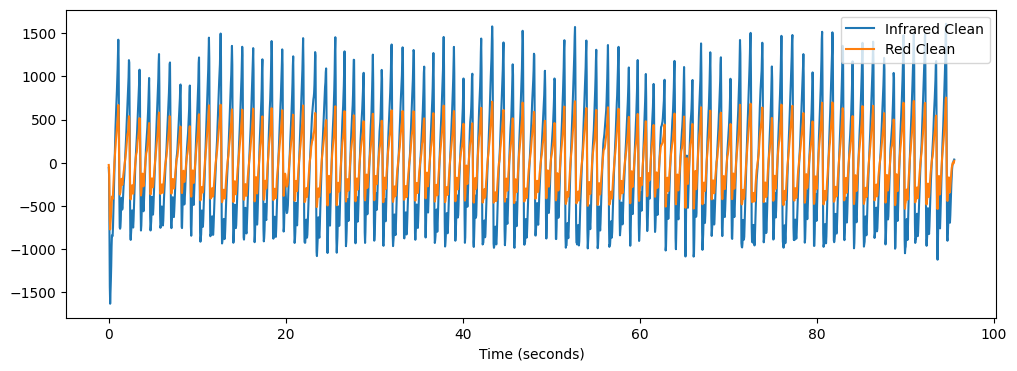

In [4]:
# calculate clean signal which are centered around zero
red_clean = nk.ppg_clean(red_raw, sampling_rate=srate)
ir_clean = nk.ppg_clean(ir_raw, sampling_rate=srate)

nk.signal_plot([ir_clean, red_clean], sampling_rate=srate, labels=['Infrared Clean', 'Red Clean'])

In [5]:
# Use formula for R
AC_red = np.std(red_clean)
DC_red = np.nanmean(red_raw)

AC_ir = np.std(ir_clean)
DC_ir = np.nanmean(ir_raw)

R = (AC_red / DC_red) / (AC_ir / DC_ir) 
print(f"R value: {R}")

R value: 0.48547959580188355


In [6]:
# Calculate from empirical formulas
print(f"Formula 1: 110 - 25*R = {110 - 25*R:.1f}%")
print(f"Formula 2: 100 - 23.3*(R-0.4) = {100 - 23.3*(R-0.4):.1f}%")


Formula 1: 110 - 25*R = 97.9%
Formula 2: 100 - 23.3*(R-0.4) = 98.0%
